In [2]:
# import library
import pandas
import numpy as np
import math
import matplotlib.pyplot as plt

import pymoo
from pymoo.model.problem import Problem

import pandas as pd


import joblib

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [6]:
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 10)


read_data = pd.read_csv("../result/result_0628_F111_N100_ferrite_h20_res0.1_PM12_UU_156.csv")

read_data = read_data.sort_values('w', ascending=True)

read_data = read_data[read_data["copperloss_tx"]<53]
read_data = read_data[read_data["copperloss_rx"]<37]


read_data

,Unnamed: 0,N1,w1,l1,l2,h1,per,space1,space2,space3,space4,coil_width1,coil_width2,move_z1,move_z2,offset_z1,offset_z2,strand1,strand2,V,B,Lmt,Llt,w,l,h,total_loss,copperloss_tx,copperloss_rx,copperloss,coreloss
88,4,9.0,40.0,33.0,246.0,89.0,3200.0,24.0,24.0,9.0,9.0,3.9,4.0,1.1,3.8,0.0,1.0,760.5,800.0,4970.618275,0.231320,867.032470,44.552352,91.9,348.95,155.0,132.531192,52.010430,35.678478,87.688907,44.842284
87,28,9.0,40.0,33.0,246.0,89.0,3200.0,24.0,24.0,9.0,9.0,3.9,4.0,1.1,3.9,0.0,0.0,760.5,800.0,4970.618275,0.231320,856.652077,44.450517,91.9,348.95,155.0,132.531192,52.010430,35.678478,87.688907,44.842284
85,38,9.0,40.0,33.0,246.0,89.0,3200.0,24.0,24.0,9.0,9.0,3.9,4.0,1.0,4.1,0.0,0.0,760.5,800.0,4970.618275,0.231320,856.652077,44.450517,91.9,348.95,155.0,132.531192,52.010430,35.678478,87.688907,44.842284
84,80,9.0,40.0,33.0,246.0,89.0,3200.0,24.0,24.0,9.0,9.0,3.9,4.0,1.1,4.2,0.0,0.0,760.5,800.0,4970.618275,0.231320,856.652077,44.450517,91.9,348.95,155.0,132.531192,52.010430,35.678478,87.688907,44.842284
83,58,9.0,40.0,33.0,246.0,89.0,3200.0,24.0,24.0,9.0,9.0,3.9,4.0,1.1,3.8,0.0,-1.0,760.5,800.0,4970.618275,0.231320,857.114941,44.447474,91.9,348.95,155.0,132.531192,52.010430,35.678478,87.688907,44.842284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,1,9.0,42.0,33.0,246.0,89.0,3200.0,24.0,24.0,9.0,9.0,3.9,4.0,1.1,3.8,0.0,1.0,760.5,800.0,5078.792775,0.220304,890.061902,44.928088,93.9,348.95,155.0,131.000635,52.847241,36.428692,89.275932,41.724703
95,41,9.0,42.0,33.0,246.0,89.0,3200.0,24.0,24.0,9.0,9.0,3.9,4.0,1.0,3.8,0.0,1.0,760.5,800.0,5078.792775,0.220304,890.061902,44.928088,93.9,348.95,155.0,131.000635,52.847241,36.428692,89.275932,41.724703
96,74,9.0,42.0,33.0,246.0,89.0,3200.0,24.0,24.0,9.0,9.0,3.9,4.0,1.0,4.1,0.0,1.0,760.5,800.0,5078.792775,0.220304,890.061902,44.928088,93.9,348.95,155.0,131.000635,52.847241,36.428692,89.275932,41.724703
97,75,9.0,42.0,33.0,246.0,89.0,3200.0,24.0,24.0,9.0,9.0,3.9,4.0,1.0,4.0,0.0,0.0,760.5,800.0,5078.792775,0.220304,879.681510,44.826253,93.9,348.95,155.0,131.000635,52.847241,36.428692,89.275932,41.724703


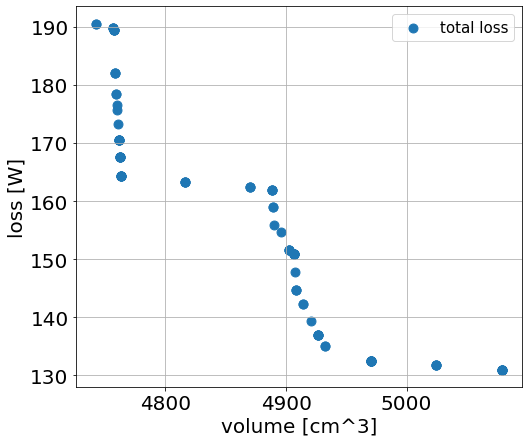

In [4]:
plt.rcParams["figure.figsize"] = (8,7)

parameters = {'xtick.labelsize' : 20,
          'ytick.labelsize' : 20}
plt.rcParams.update(parameters)


plt.scatter(read_data["V"], read_data["total_loss"] ,s=80)
#plt.scatter(read_data["V"], read_data["copperloss_tx"] ,s=80)
#plt.scatter(read_data["V"], read_data["copperloss_rx"] ,s=80)
plt.xlabel("volume [cm^3]", fontsize=20)
plt.ylabel("loss [W]", fontsize=20)
plt.grid(True)
plt.legend(["total loss","copperloss_tx","copperloss_rx"], fontsize=15)
#plt.legend(["copperloss_tx","copperloss_rx"], fontsize=15)

In [5]:


read_data1 = pd.read_csv("../result/result_0628_F111_N10000_amorphous_h20_hlimit150_res0.1.csv")
read_data2 = pd.read_csv("../result/result_0628_F151_N10000_amorphous_h20_hlimit150_res0.1.csv")
#read_data3 = pd.read_csv("../result/result_0628_F151_N10000_ferrite_h30_hlimit150_res0.1.csv")



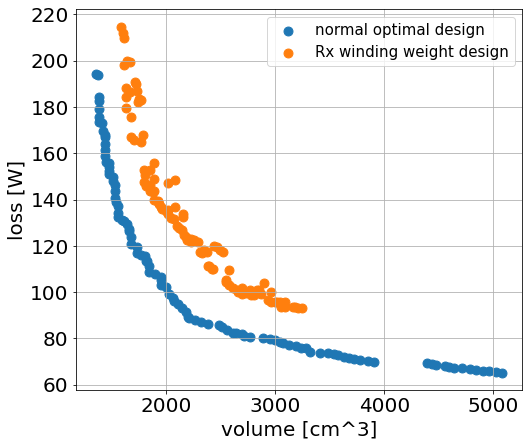

In [7]:
plt.rcParams["figure.figsize"] = (8,7)

parameters = {'xtick.labelsize' : 20,
          'ytick.labelsize' : 20}
plt.rcParams.update(parameters)


plt.scatter(read_data1["V"], read_data1["total_loss"] ,s=80)
plt.scatter(read_data2["V"], read_data2["total_loss"] ,s=80)
#plt.scatter(read_data3["V"], read_data3["total_loss"] ,s=80)
#plt.scatter(read_data1["V"], read_data1["copperloss_tx"] ,s=80)
#plt.scatter(read_data2["V"], read_data2["copperloss_tx"] ,s=80)
#plt.scatter(read_data3["V"], read_data3["copperloss_tx"] ,s=80)
plt.xlabel("volume [cm^3]", fontsize=20)
plt.ylabel("loss [W]", fontsize=20)
plt.grid(True)
plt.legend(["normal optimal design","Rx winding weight design"], fontsize=15)

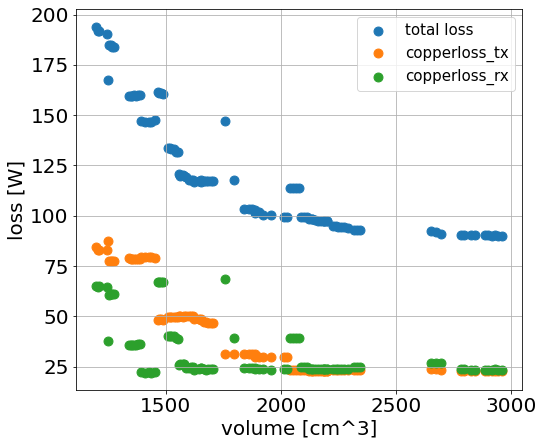

In [ ]:
import yaml
import os
import subprocess
import random
import csv
import time
import csv
import numpy as np
import math
import pandas as pd
import shutil

#from pycaret.regression import load_model


																																																

REFERENCE_SCRIPT_FILE_NAME = f'run_ansys_ref.py'

def random_choice(X) :
    return round(np.random.choice( np.arange( X[0] , X[1]+X[2] , X[2]) ),X[3])
    
def run_simul(version_idx_str):
    #0 Initialize random variables

    X_len_range = [2, 20, 1, 0]
    Y_len_range = [5, 20, 1, 0] # under, upper, resolution
    Z_len_range = [10, 50, 1, 0]
    len_range = [1, 4.5, 0.5, 1]
    
    Cur1_range = [10, 1000, 50, 0]
    Cur2_range = [10,2000,50,0]

    # Design 1

    X_len = random_choice(X_len_range)
    Y_len = random_choice(Y_len_range)
    Z_len = random_choice(Z_len_range)
    len = random_choice(len_range)
    
    Cur1 = random_choice(Cur1_range)
    Cur2 = random_choice(Cur2_range)

    Y_comp = 21*len/16-Y_len
    
    if Y_comp>0:
        len = len-1
   
    #print(l2_range)
        
    #FIXME : add some variables


    #0.5 Config Identifier-Variable set.
    config = {
        "$VERSION_IDX_STR"  :   version_idx_str,
        "$X_len"  :  X_len,
        "$Y_len"  :  Y_len,
        "$Z_len"  :  Z_len,
        "$len"  :  len,
        "$Cur1"  :  Cur1,
        "$Cur2"  :  Cur2,
              
        #FIXME : add some idt : variables
    }


    #1 Make Folder
    folder_name = f'SIMUL_{version_idx_str}'
    os.mkdir(f'.\\ML\\SIMUL_{version_idx_str}')


    #2 Make Variable info file
    with open(f'.\\ML\\SIMUL_{version_idx_str}\\info.yaml', "w") as info_file:
        yaml.dump(config,info_file)


    #3 Make python script file
    #Load file string
    ref_script_str = ""
    with open(REFERENCE_SCRIPT_FILE_NAME) as f :
        lines = f.readlines()
    ref_script_str = "\n".join(lines)

    #Change Identifiers
    for idt, var in config.items() :
        ref_script_str = ref_script_str.replace(idt, str(var))

    #Save file
    with open(f'.\\ML\\SIMUL_{version_idx_str}\\run_ansys_{version_idx_str}.py',"w") as f :
        f.write(ref_script_str)


    #4 make batch file.
    filepath2 = os.path.join('ML',folder_name,f'run_bat_{version_idx_str}.bat')
    with open(f'.\\ML\\SIMUL_{version_idx_str}\\run_bat_{version_idx_str}.bat',"w") as f :
        f.write(f'"C:\\Program Files\\AnsysEM\\AnsysEM21.1\\Win64\\ansysedt.exe" -iconic -runscript ".\\run_ansys_{version_idx_str}.py"')


    workingDir = f'.\\ML\\SIMUL_{version_idx_str}'
    executeFile =  f'.\\ML\\SIMUL_{version_idx_str}\\run_bat_{version_idx_str}.bat'
    #os.chdir(workingDir)
    try :
        os.system(executeFile)
        print(executeFile)
    except :
        time.sleep(1)

    temp1 = pd.read_csv(f'.\ML_data\magnetizing inductance{version_idx_str}.csv', sep=",")
    if temp1.columns[1] == "Matrix1.CplCoef(Current1,Current2)^2 * Matrix1.L(Current1,Current1) [mH]" :
        temp1 = temp1.to_numpy()
        temp1[:,1] = temp1[:,1]*1000
        temp1[:,2] = temp1[:,2]*1000
    else :
        temp1 = temp1.to_numpy()

    parameter = np.array([X_len,Y_len,Z_len,len,Cur1,Cur2])
    print(parameter)

    temp1 = np.append(parameter,temp1)

    data1 = np.loadtxt(f'Z:\Autosimul_data\education\ML_param\parameter.csv', delimiter=",")
    new_data1 = np.vstack((data1, temp1))
    np.savetxt(f'Z:\Autosimul_data\education\ML_param\parameter.csv',new_data1,delimiter=",")


for i in range(4, 1000): 

    #run_simul(i)
    #print("end")


    try :
        try:
            os.remove(f'.\ML_aedt\ML1.aedt.lock')
        except Exception as e: 
            print(f'error before remove : {e}')
            time.sleep(1)
        if os.path.isfile(f'.\ML_aedt\ML1.aedt') :
            os.remove(f'.\ML_aedt\ML1.aedt')
        time.sleep(1)	

        shutil.copy(f'.\ML_aedt\ML_ref.aedt',f'.\ML_aedt\ML1.aedt')
        print(f'copy compelete')
        time.sleep(1)

        try:
            run_simul(i)
            print(f'run_simul compelete')
        except Exception as e: 
            print(f'error run_simul {i}')
            print(e)

        if os.path.isfile(f'.\ML_aedt\ML1.aedt') :
            os.remove(f'.\ML_aedt\ML1.aedt')
        time.sleep(1)	

        shutil.rmtree(f'.\ML_aedt\ML1.aedtresults')
        try:
            os.remove(f'.\ML_aedt\ML1.aedt.lock')
        except:
            print(f'error after remove : {e}')
            time.sleep(1)
    except :
        time.sleep(1)	


    
    time.sleep(1)


os.system("pause")
